<a href="https://colab.research.google.com/github/seismosmsr/machine_learning/blob/main/gedi_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# install.packages('sf')
# install.packages('raster')
# install.packages('exactextractr')
# install.packages("googledrive")
# install.packages("googletoken")
# install.packages("DBI")
# install.packages("RSQLite")
install.packages("RPostgreSQL")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [1]:
library(ggplot2)
library(sf)
library(magrittr)
library(data.table)
library(raster)
library(exactextractr)
library(googledrive)
library(DBI)

Linking to GEOS 3.10.2, GDAL 3.4.3, PROJ 8.2.1; sf_use_s2() is TRUE

Loading required package: sp

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)



In [4]:
while(TRUE){}

In [6]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=c3e5b93d6fdeea101ea7b643d2430d6a&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWRldTVCVjdZV0JvenpLYXY3blZJOWhIZW4zZ3I0aWFENm9kSmZPNmRuVDZXZ2NCRjRrYkZuOWF3TkdTc29zSGxyeTB0QSIsInN0YXRlIjoiMjI3OWQxMDRmNjlhZDg0YWQ4ZDNmYjA2OTk4YTk1MjIifQ==


ERROR: ignored

In [ ]:
# GEDI data
# https://drive.google.com/file/d/14jTxo28D2bsC68EpVsbSaY7SpYM5MIA4/view?usp=drive_link

# Landtrendr data
# https://drive.google.com/file/d/1FrN1tUojGV80f3kDtmezsFsvLabIoGiW/view?usp=drive_link

# HUC 8
# https://drive.google.com/file/d/1r6CIYLOy01N8B1jc7Hr8AJUkA0jPXp9z/view?usp=drive_link

# HUC 10
# https://drive.google.com/file/d/1m86VWKw3nys-oY931eq9dC6xv0cEfs4a/view?usp=drive_link

# HUC 12
# https://drive.google.com/file/d/18ayVCWhBkP1Tb_wrWgPJea8vaWEiPgOL/view?usp=drive_link

In [7]:
drive_download(file = as_id('1FrN1tUojGV80f3kDtmezsFsvLabIoGiW'), path =  '/content/HJA_LandTrendr_84_23.tif', overwrite = TRUE)

Is it OK to cache OAuth access credentials in the folder ~/.cache/gargle
between R sessions?
1: Yes
2: No


Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=94005f9f1d57c8e9358392e4ce269762&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWRldTVCV3I5SERuWXc5TnpSa0pkVXpKLUN0bWYxQ29lNHJBY1JITThwQ0RHc0dMa0F1eGZUWjJjdjl3YUIyaFdWTFR0QSIsInN0YXRlIjoiYzNlNWI5M2Q2ZmRlZWExMDFlYTdiNjQzZDI0MzBkNmEifQ==


ERROR: ignored

In [ ]:
drive_download(file = as_id('14jTxo28D2bsC68EpVsbSaY7SpYM5MIA4'), path =  '/content/HJA_gedi.gpkg', overwrite = TRUE)

In [ ]:
drive_download(file = as_id('1r6CIYLOy01N8B1jc7Hr8AJUkA0jPXp9z'), path =  '/content/huc_8.gpkg', overwrite = TRUE)
drive_download(file = as_id('1m86VWKw3nys-oY931eq9dC6xv0cEfs4a'), path =  '/content/huc_10.gpkg', overwrite = TRUE)
drive_download(file = as_id('18ayVCWhBkP1Tb_wrWgPJea8vaWEiPgOL'), path =  '/content/huc_12.gpkg', overwrite = TRUE)

In [2]:
gedi_sf <- st_read('/content/HJA_gedi.gpkg')

Reading layer `HJA_GEDI_4' from data source `/content/HJA_gedi.gpkg' using driver `GPKG'
Simple feature collection with 5447829 features and 15 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -123.6642 ymin: 43.85895 xmax: -121.7601 ymax: 44.90795
Geodetic CRS:  WGS 84


In [76]:
landtrendr_tif <- stack('/content/HJA_LandTrendr_84_23.tif')

In [4]:
huc_8_gpgk <- st_read('/content/huc_8.gpkg') %>% st_transform(st_crs(gedi_sf))
huc_10_gpgk <- st_read('/content/huc_10.gpkg')  %>% st_transform(st_crs(gedi_sf))
huc_12_gpgk <- st_read('/content/huc_12.gpkg')  %>% st_transform(st_crs(gedi_sf))

Reading layer `wbdhu8_central_oregon__wdb_oregon_state_gdb__wbdhu8' from data source `/content/huc_8.gpkg' using driver `GPKG'
Simple feature collection with 4 features and 15 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -123.6643 ymin: 43.85856 xmax: -121.7597 ymax: 44.90894
Geodetic CRS:  NAD83
Reading layer `wdb_oregon_state_gdb__wbdhu10' from data source 
  `/content/huc_10.gpkg' using driver `GPKG'
Simple feature collection with 27 features and 17 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -123.6643 ymin: 43.85856 xmax: -121.7597 ymax: 44.90894
Geodetic CRS:  NAD83
Reading layer `wdb_oregon_state_gdb__wbdhu12' from data source 
  `/content/huc_12.gpkg' using driver `GPKG'
Simple feature collection with 161 features and 20 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -123.6643 ymin: 43.85856 xmax: -121.7597 ymax: 44.90894
Geodetic CRS:  NAD83


In [20]:
# Install and load required packages
# install.packages(c("sf", "DBI"))
library(sf)
library(DBI)

# Read a spatial dataset (e.g., a shapefile) into R
# dataset <- st_read("path_to_your_dataset.shp")

# Connect to the PostgreSQL database
conn <- RPostgreSQL::dbConnect("PostgreSQL",
                 dbname = "jifesypi",
                 host = "mild-williams-pear.db.elephantsql.com",
                #  port = "your_port",
                 user = "jifesypi",
                 password = "Qxds23zjkpIIU343-GGHNlxqFdD3Pdlr")

# # Ensure the connection is PostGIS-enabled
# if (!st_is_postgis(con)) {
#   stop("The database is not PostGIS enabled!")
# }

# Upload the dataset to PostgreSQL
# 'name' parameter determines the name of the table in the database
st_write(gedi_sf, conn, layer = "hja_gedi", delete_layer = TRUE)

# Close the database connection
dbDisconnect(conn)


[1] TRUE

In [118]:
query_wkt <- st_as_text(huc_10_gpgk[11,]$geom, crs = 4326, EWKT = TRUE)

query_sql <- paste0("SELECT * FROM hja_gedi WHERE ST_Intersects(geom,'",query_wkt,"')")
print(query_sql)
# Connect to the PostgreSQL database
conn <- RPostgreSQL::dbConnect("PostgreSQL",
                 dbname = "jifesypi",
                 host = "mild-williams-pear.db.elephantsql.com",
                #  port = "your_port",
                 user = "jifesypi",
                 password = "Qxds23zjkpIIU343-GGHNlxqFdD3Pdlr")

gedi_sf <- st_read(conn,query=query_sql)

dbDisconnect(conn)

[1] "SELECT * FROM hja_gedi WHERE ST_Intersects(geom,'SRID=4326;MULTIPOLYGON (((-122.675 44.4137, -122.674 44.4136, -122.6734 44.4136, -122.6732 44.41359, -122.6726 44.41355, -122.6718 44.41348, -122.6712 44.41345, -122.6707 44.41352, -122.6701 44.41362, -122.67 44.41334, -122.6697 44.41297, -122.6692 44.41242, -122.6684 44.41165, -122.6682 44.41145, -122.6677 44.41111, -122.6669 44.41071, -122.6658 44.4102, -122.6641 44.40956, -122.6633 44.40934, -122.6623 44.40888, -122.6609 44.40827, -122.6605 44.4081, -122.6597 44.40791, -122.6583 44.40771, -122.6576 44.40756, -122.6571 44.40737, -122.6568 44.40716, -122.6567 44.40701, -122.6566 44.40672, -122.6565 44.40642, -122.6565 44.40641, -122.6564 44.4061, -122.6562 44.40581, -122.656 44.40551, -122.6554 44.40489, -122.6545 44.40397, -122.6542 44.40377, -122.6537 44.40342, -122.6529 44.40307, -122.6524 44.40295, -122.6519 44.40285, -122.6511 44.40278, -122.6503 44.40274, -122.6494 44.40268, -122.6488 44.40255, -122.6481 44.40239, -122.648 44

[1] TRUE

In [119]:
gedi_dt <- gedi_sf %>% data.table
gedi_dt %>% nrow
gedi_dt[l4_quality_flag ==1,] %>% nrow

[1] 85232

[1] 27787

In [120]:
# landtrendr_tif[landtrendr_tif < 0] <- NA

In [121]:
gedi_dt[,geom_buffer := geom %>% st_transform('EPSG:6822') %>% st_buffer(25)]

In [122]:
extract_dt <-
gedi_dt[,geom_buffer] %>% st_as_sf %>%
exact_extract(landtrendr_tif,.,force_df=T,c('min','max','mean','median'))

Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


In [123]:
summary_dt <- data.table(gedi_dt,extract_dt[,names(extract_dt) %>% strsplit('[.]') %>% lapply(function(x){x[[1]]}) %>% unlist %>% order])

In [124]:
summary_dt %>% head

agbd,lat_lowestmode,lon_lowestmode,agbd_pi_lower,agbd_pi_upper,agbd_se,agbd_t,agbd_t_se,algorithm_run_flag,channel,⋯,median.dur,median.preval,median.rate,median.dsnr,min.yod,min.mag,min.dur,min.preval,min.rate,min.dsnr
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-9999,44.34332,-122.6241,-9999,-9999,-9999,-9999,-9999,0,1,⋯,1.0,868.5213,515.9381,25.56208,2021,469,1,852,469,16
-9999,44.36153,-122.6535,-9999,-9999,-9999,-9999,-9999,0,0,⋯,1.5,866.8252,487.6200,10.09755,2001,372,1,850,186,7
-9999,44.36126,-122.6529,-9999,-9999,-9999,-9999,-9999,0,0,⋯,1.0,871.6925,572.3424,14.76702,2001,508,1,847,508,10
-9999,44.36099,-122.6523,-9999,-9999,-9999,-9999,-9999,0,0,⋯,1.0,874.6734,509.8616,15.56840,2001,474,1,855,474,8
-9999,44.36073,-122.6517,-9999,-9999,-9999,-9999,-9999,0,0,⋯,1.0,849.9710,460.3385,12.92027,2001,372,1,793,372,7
-9999,44.36046,-122.6511,-9999,-9999,-9999,-9999,-9999,0,0,⋯,1.0,837.1945,450.7231,13.23034,2001,387,1,815,387,9


`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


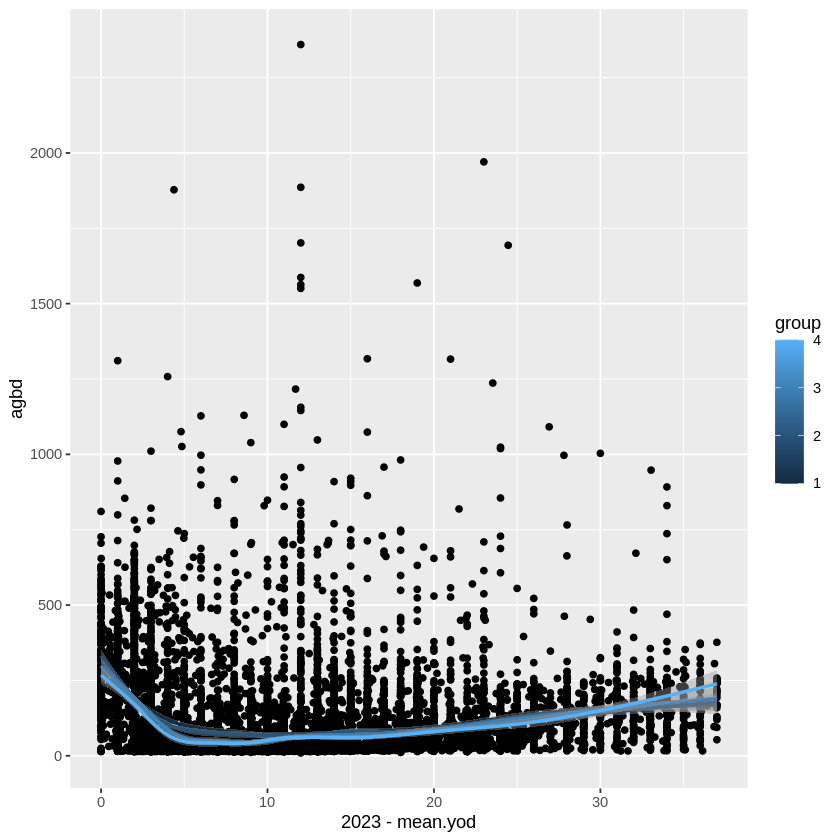

In [126]:
summary_dt[min.yod>1984 &agbd>0,][,group:=as.integer(cut(mean.mag, breaks = quantile(mean.mag, probs = seq(0, 1, by = 0.25)), labels = FALSE, include.lowest = TRUE)) ] %>%
ggplot(aes(x=2023 - mean.yod,y=agbd,group=group))+
geom_point()+
geom_smooth(aes(color=group))